In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import mne
from mne.preprocessing import ICA
from datetime import datetime


def plot_data(data, ch_names):
    plt.figure(figsize=(15, 8))
    timestamps = [float(row['timestamp']) for row in data]

    for ch_name in ch_names:
        ch_data = [float(row[ch_name]) for row in data]
        plt.plot(timestamps, ch_data, label=ch_name)

    plt.xlabel('Time (s)')
    plt.ylabel('Sensor Value')
    plt.title('Brainwave Data')
    plt.legend()
    plt.show()
    
#csvに保存
def save_clean_data_to_csv(raw_clean, ch_names, filename):
    data = raw_clean.get_data().T
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['timestamp'] + ch_names)
        for i, row in enumerate(data):
            timestamp = raw_clean.times[i]
            writer.writerow([timestamp] + list(row))
            
def load_data_from_csv(filename):
    data = []
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(row)
    return data

def create_mne_raw_object(data, ch_names, sfreq):
    n_channels = len(ch_names)
    n_samples = len(data)

    data_array = np.empty((n_channels, n_samples))
    for i, row in enumerate(data):
        for j, ch_name in enumerate(ch_names):
            data_array[j, i] = float(row[ch_name])

    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
    raw = mne.io.RawArray(data_array, info)
    return raw

Creating RawArray with float64 data, n_channels=14, n_times=2262
    Range : 0 ... 2261 =      0.000 ...    17.664 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 546.0s.
Creating RawArray with float64 data, n_channels=14, n_times=2262
    Range : 0 ... 2261 =      0.000 ...    17.664 secs
Ready.
Using matplotlib as 2D backend.


/home/nakalab_2023/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


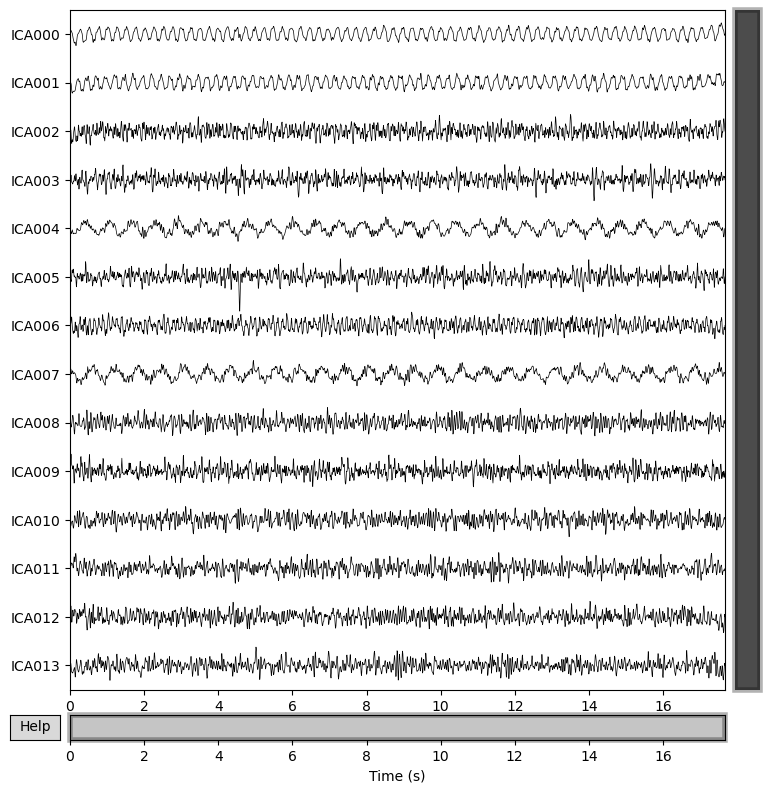

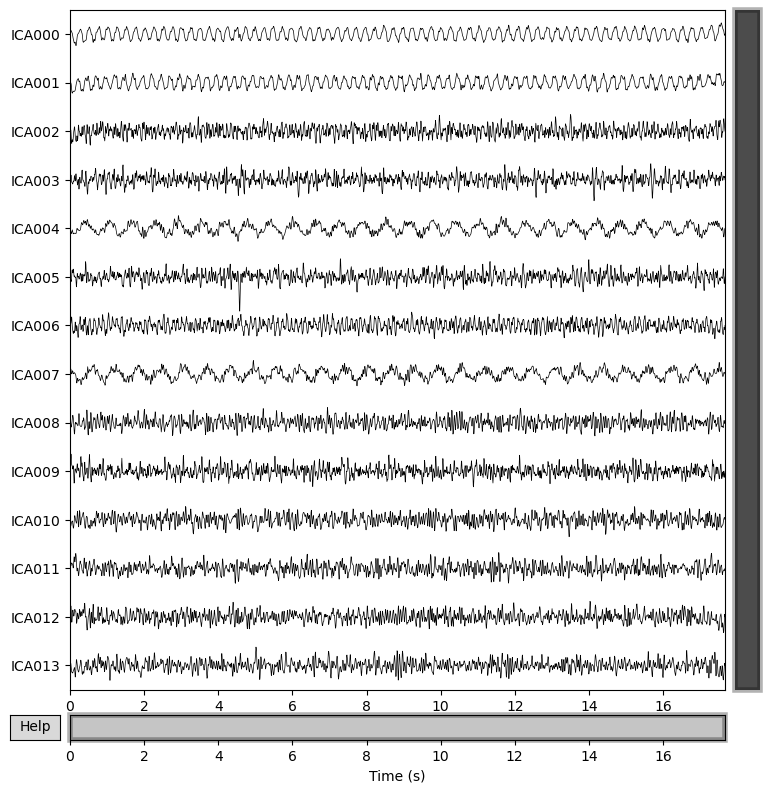

In [2]:
#ICA分析（何もしてない状態）

filename = 'epoc_X_data.csv'
data = load_data_from_csv(filename)

# 選択したチャンネルをプロット
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
sfreq =  128 # サンプリング周波数

raw = create_mne_raw_object(data, ch_names, sfreq)

# 事前にハイパスフィルタを適用してデータのトレンドを除去
raw.filter(l_freq=1, h_freq=None)

# ICAを実行
ica = ICA(n_components=14, random_state=0, max_iter=1000000)
ica.fit(raw)

# ICA成分をプロット
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=14, n_times=2262
    Range : 0 ... 2261 =      0.000 ...    17.664 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 556.5s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components


/home/nakalab_2023/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


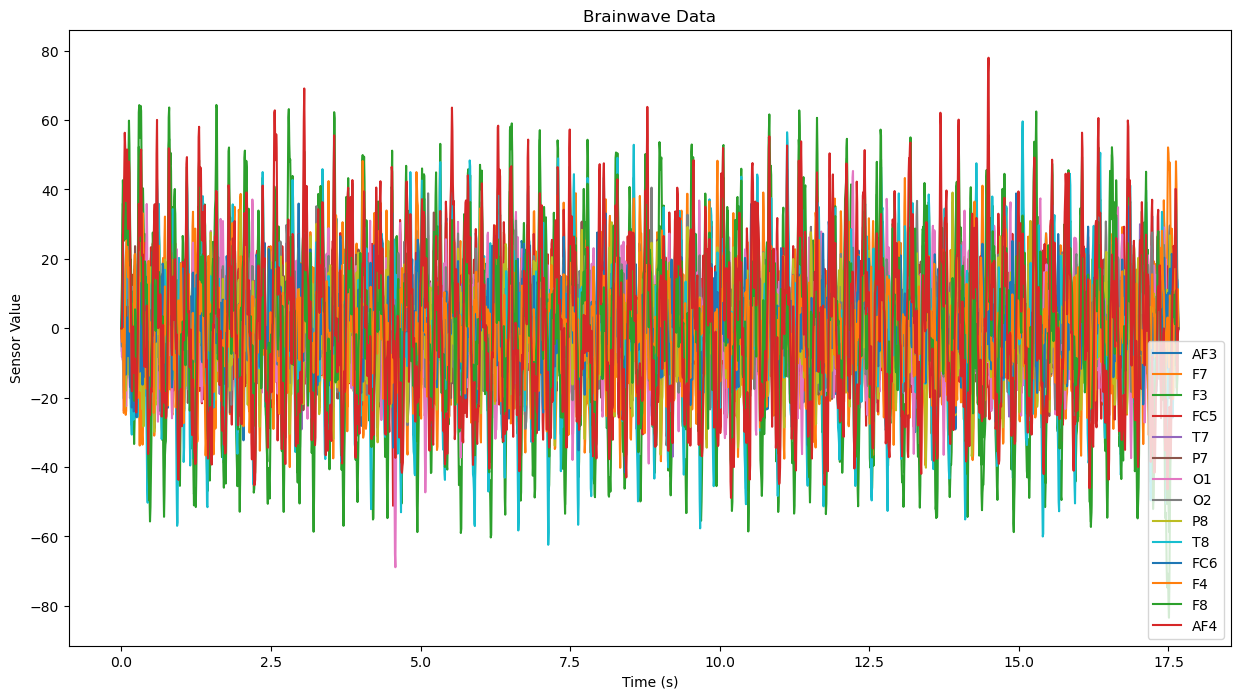

In [7]:
filename = 'epoc_X_data.csv'
data = load_data_from_csv(filename)

# 選択したチャンネルをプロット
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
sfreq =  128 # サンプリング周波数

raw = create_mne_raw_object(data, ch_names, sfreq)

# 事前にハイパスフィルタを適用してデータのトレンドを除去
raw.filter(l_freq=1, h_freq=None)

# ICAを実行
ica = ICA(n_components=14, random_state=0, max_iter=1000000)
ica.fit(raw)

# ICA 成分と他のチャンネルとの相関を計算
ica_sources = ica.get_sources(raw).get_data()
raw_data = raw.get_data()
stacked_data = np.vstack((ica_sources, raw_data))
corr_matrix = np.corrcoef(stacked_data)

# 閾値以上の相関がある成分を特定
threshold = 0.8 #なんとなく0.8
n_ica_components = ica_sources.shape[0]
bad_indices = np.where(np.abs(corr_matrix[:n_ica_components, n_ica_components:]) > threshold)

# 眼球運動に関連する成分のインデックスを追加
ica.exclude = np.unique(bad_indices[0])

# ICA を適用してノイズを除去
raw_clean = raw.copy()
ica.apply(raw_clean)
            
filename = 'epoc_X_data_clean_auto_v1.csv'
save_clean_data_to_csv(raw_clean, ch_names, filename)

#プロット
clean_data = load_data_from_csv(filename)
plot_data(clean_data, ch_names)


Creating RawArray with float64 data, n_channels=14, n_times=1211
    Range : 0 ... 1210 =      0.000 ...     9.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 414.9s.
Creating RawArray with float64 data, n_channels=14, n_times=1211
    Range : 0 ... 1210 =      0.000 ...     9.453 secs
Ready.


/home/nakalab_2023/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


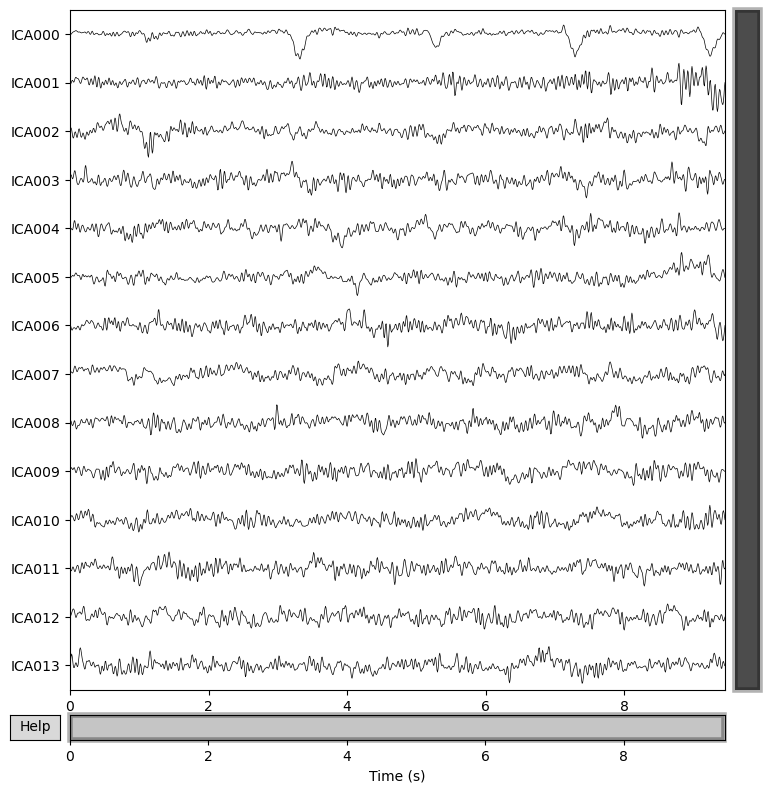

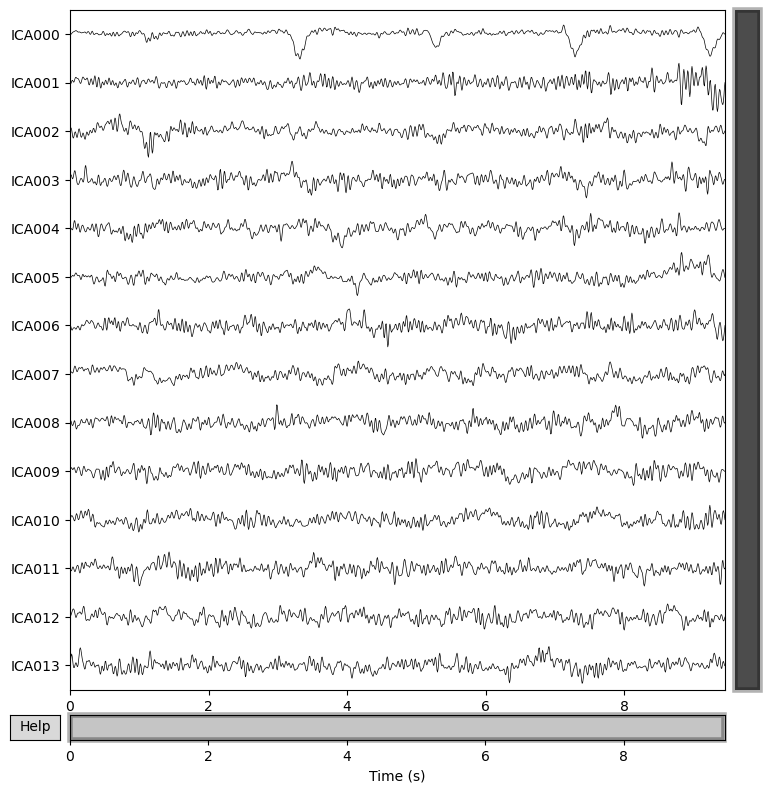

In [3]:
#ICA分析（１秒毎に目を閉じる）

filename = 'epoc_X_data_ICAtest_EOG.csv'
data = load_data_from_csv(filename)

# 選択したチャンネルをプロット
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
sfreq =  128 # サンプリング周波数

raw = create_mne_raw_object(data, ch_names, sfreq)

# 事前にハイパスフィルタを適用してデータのトレンドを除去
raw.filter(l_freq=1, h_freq=None)

# ICAを実行
ica = ICA(n_components=14, random_state=0ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations., max_iter=1000000)
ica.fit(raw)

# ICA成分をプロット
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=14, n_times=1211
    Range : 0 ... 1210 =      0.000 ...     9.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 418.4s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components


/home/nakalab_2023/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


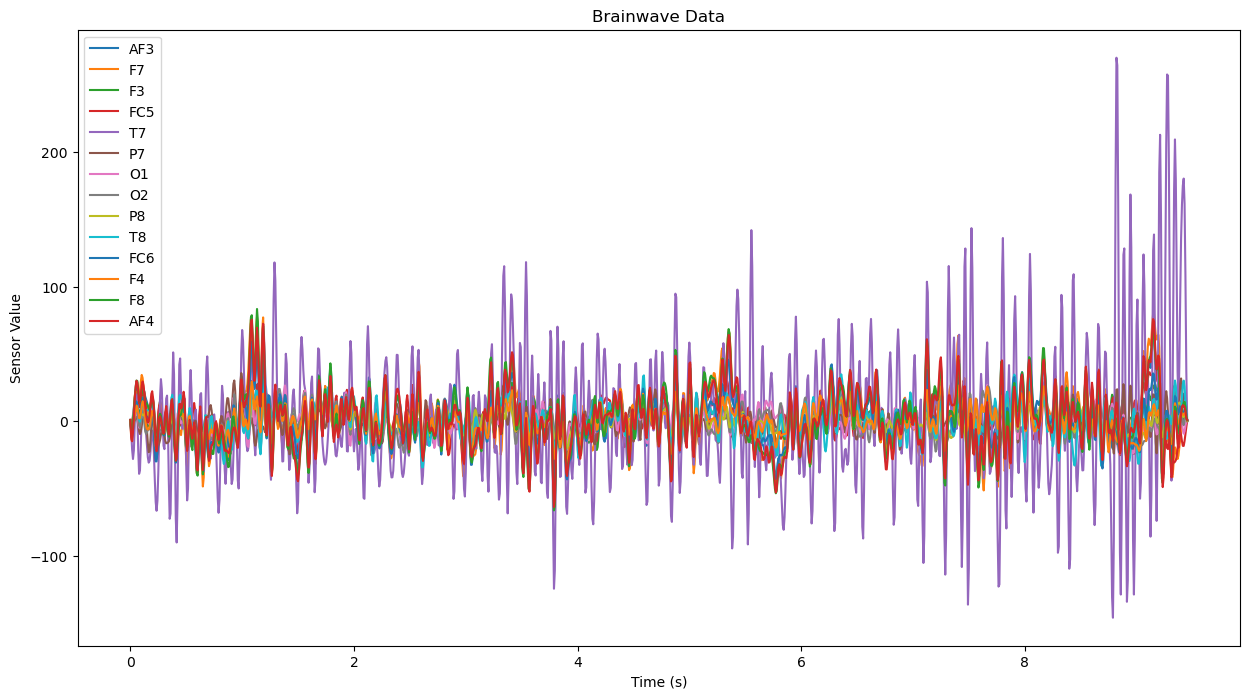

In [4]:
#手動によるEOG(眼球運動)除去のためのもの

filename = 'epoc_X_data_ICAtest_EOG.csv'
data = load_data_from_csv(filename)

# 選択したチャンネルをプロット
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
sfreq =  128 # サンプリング周波数

raw = create_mne_raw_object(data, ch_names, sfreq)

# 事前にハイパスフィルタを適用してデータのトレンドを除去
raw.filter(l_freq=1, h_freq=None)

# ICAを実行
ica = ICA(n_components=14, random_state=0, max_iter=1000000)
ica.fit(raw)

# 眼球運動に関連する成分のインデックスを追加
EOG_index = 0 #EOGだと思われるインデクス番号（データによって異なる）
ica.exclude = [EOG_index] 

# ICA を適用してノイズを除去
raw_clean = raw.copy()
ica.apply(raw_clean)
    
filename = 'epoc_X_data_clean_manual.csv'
save_clean_data_to_csv(raw_clean, ch_names, filename)

#プロット
clean_data = load_data_from_csv(filename)
plot_data(clean_data, ch_names)

Creating RawArray with float64 data, n_channels=14, n_times=1211
    Range : 0 ... 1210 =      0.000 ...     9.453 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 417.0s.
Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components


/home/nakalab_2023/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


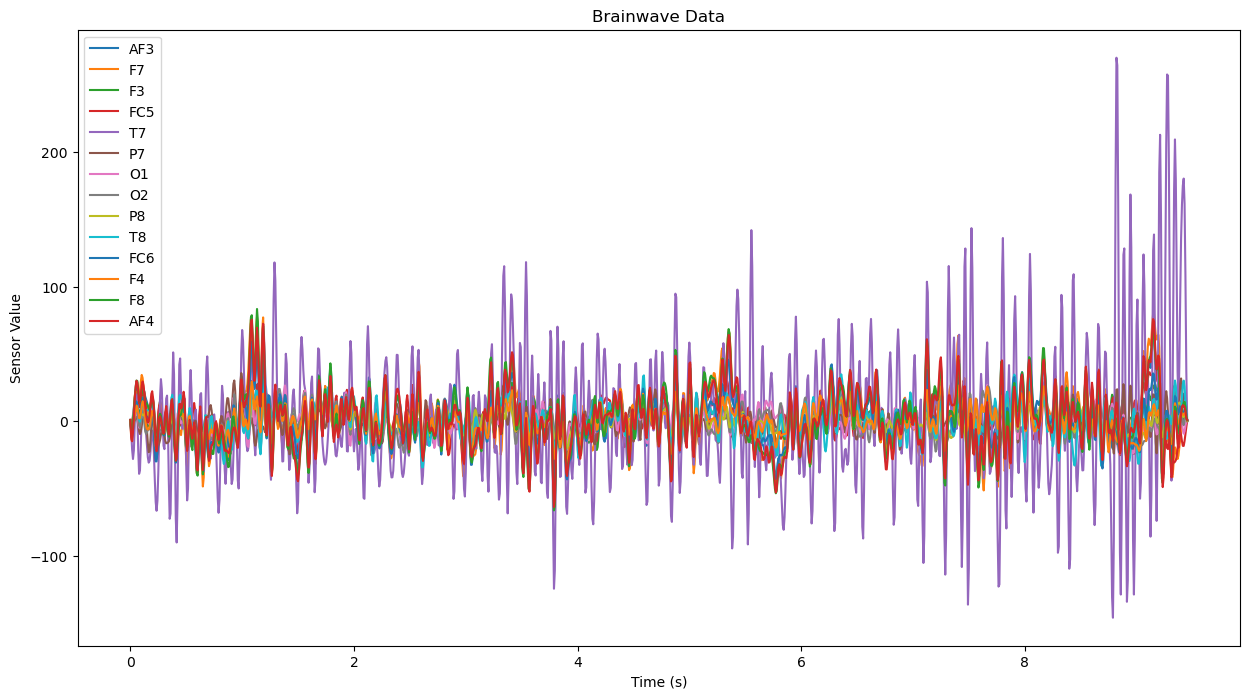

In [6]:
#アーティファクト検出アルゴリズムを使用したもの(全体から相関をもとめる)
#ICA 成分と他のチャンネルとの相関を計算し、相関が閾値以上の成分を自動的に除去するプログラム

filename = 'epoc_X_data_ICAtest_EOG.csv'
data = load_data_from_csv(filename)

# 選択したチャンネルをプロット
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
sfreq =  128 # サンプリング周波数

raw = create_mne_raw_object(data, ch_names, sfreq)

# 事前にハイパスフィルタを適用してデータのトレンドを除去
raw.filter(l_freq=1, h_freq=None)

# ICAを実行
ica = ICA(n_components=14, random_state=0, max_iter=1000000)
ica.fit(raw)

# ICA 成分と他のチャンネルとの相関を計算
ica_sources = ica.get_sources(raw).get_data()
raw_data = raw.get_data()
stacked_data = np.vstack((ica_sources, raw_data))
corr_matrix = np.corrcoef(stacked_data)

# 閾値以上の相関がある成分を特定
threshold = 0.8 #なんとなく0.8
n_ica_components = ica_sources.shape[0]
bad_indices = np.where(np.abs(corr_matrix[:n_ica_components, n_ica_components:]) > threshold)

# 眼球運動に関連する成分のインデックスを追加
ica.exclude = np.unique(bad_indices[0])

# ICA を適用してノイズを除去
raw_clean = raw.copy()
ica.apply(raw_clean)
            
filename = 'epoc_X_data_clean_auto_v1.csv'
save_clean_data_to_csv(raw_clean, ch_names, filename)

#プロット
clean_data = load_data_from_csv(filename)
plot_data(clean_data, ch_names)
